# MVP: Exploratory Data Analysis Project

## Data science and the stack overflow developers survery
### Goals: Using the stack overflow data answer this question: Where are data scientists working and who are they working for? How career satisfied are Data Scientists?

## Initial Data Cleaning and Eploratory Findings
#### I examined data from the 2017 Stack Overflow developer survey. The data contained responses from over 50,000 Stack Overflow users to questions on an extensive range of topics. Survey respondents included many types of Stack Overflow users, including data scientists. Since I am interested in the career satisfaction, job placement and location and of data scientists, I started by narrowing the data set to focus on categories that initally seemed to be related to this question. I got rid of most columns in the data set (each coloumn corresponds to a question response, each row corresponds to one respondent); there were originally 154 columns which I narrowed down to 11. Since we are only interested in data scientists, I made a function to identify respondents identifying as data scientists. I used this function to select only the rows in which the respondent identified his or herself as a data scientist. This further narrowed down the data from over 50,000 respondents to 1100.

## Methodology
#### With the data cleaning complete, I began summarizing the data by making several histograms and pie charts. As they are directly related to the question of "How career satisfied are data scientists?", I made histograms of the career satisfaction and job satisfaction ratings. This should provide some sense of how the data are distributed. Next, I sorted the responsdents by country and company type, and made a pie chart for each, which allowed me to visually represent the distribution of data scientists by company and company type. Finally, I identified some additional questions and topics to explore based on this MVP analysis. 

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
%matplotlib inline
pd.options.mode.chained_assignment = None  # Turn off warnings

In [4]:
data = pd.read_csv('../data/survey_results_public.csv')

In [7]:
data.shape

(51392, 154)

In [175]:
narrow_data = data[['Professional', 'Country', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
               'CompanySize', 'CompanyType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction']]

In [12]:
narrow_data.shape

(51392, 11)

In [176]:
narrow_data[:5]

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction
0,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0


### Narrow down the data to those identifying as a Data Scientist
#### Note: This category contains other such as: Data scientist; educator - need to include these in the data

In [219]:
def find_ds(a_string):
    '''Takes a string and looks for the words "Data scientist", if so, returns the row'''
    try:
        if re.search(r'Data scientist', a_string):
        #return ds.group()
            return 1
        else:
            return 0
    except:
        #return None
        return 0

In [181]:
narrow_data['DataScientist'] = narrow_data['NonDeveloperType'].apply(find_ds)
narrow_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,DataScientist
0,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,0
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0,0
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,1
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0,0


In [184]:
ds_data = narrow_data[narrow_data.DataScientist == 1] 
# make a function to search for data scientist in each string

In [190]:
ds_data.shape

(1100, 12)

#### The data are now much smaller - 1100 people identified as "Data Scientist"

In [192]:
ds_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,DataScientist
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,1
6,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,Data scientist,7.0,6.0,1
528,Professional non-developer who sometimes write...,El Salvador,Employed full-time,Some college/university study without earning ...,A business discipline,About half the time,10 to 19 employees,Publicly-traded corporation,Analyst or consultant; Data scientist,10.0,10.0,1
618,Professional non-developer who sometimes write...,United States,Employed part-time,Some college/university study without earning ...,Something else,It's complicated,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist; Designe...,9.0,7.0,1
658,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,A business discipline,A few days each month,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist,8.0,9.0,1


### First, we will look at the distribution of the career/job satisfaction data using a histogram

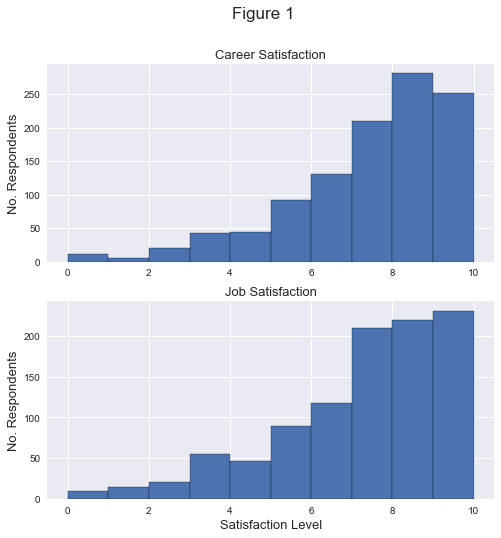

In [187]:
f, ax = plt.subplots(2, sharex=False, figsize=(8, 8))

ax[0].hist(ds_data['CareerSatisfaction'].dropna(axis=0), edgecolor='k')
ax[0].set_ylabel('No. Respondents', fontsize='13')
ax[0].set_title('Career Satisfaction', fontsize='13')

ax[1].hist(ds_data['JobSatisfaction'].dropna(axis=0), edgecolor='k')
ax[1].set_xlabel('Satisfaction Level', fontsize='13')
ax[1].set_ylabel('No. Respondents', fontsize='13')
ax[1].set_title('Job Satisfaction', fontsize='13')

plt.suptitle('Figure 1', fontsize='17')

#### The data are right distributed - indicating that data scientists' career and job satisfaction levels skew toward higher levels of satisfaction

### Now let's take a look at where data scientists are located
#### The data will be limited to those countries with 30 or more data scientists in the survey

In [188]:
countries = ds_data.groupby('Country')['Professional'].count().reset_index()

In [202]:
top_countries = countries[countries['Professional'] >= 30]
top_countries.head()

,Country,Professional
18,Canada,38
31,Germany,121
39,India,52
93,United Kingdom,92
94,United States,271


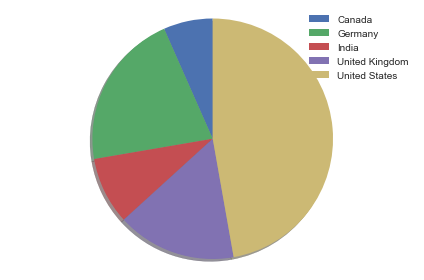

In [203]:
labels = list(top_countries['Country'])
sizes = list(top_countries['Professional'])

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc='best')

plt.axis('equal')
plt.tight_layout()

plt.show()

In [204]:
# how to prevent the legend from overlapping the pie chart?

#### The country with the most data scientists appears to be the US, followed by the UK and Germany. 

### Now we will take a look at where data scientists are working (i.e. company types)

#### Again we will limit the data to company types with more than 30 data scientists

In [205]:
ds_data.CompanyType.unique()

array(['Non-profit/non-governmental organization or private school/university',
       'Government agency or public school/university',
       'Publicly-traded corporation',
       'Privately-held limited company, not in startup mode', nan,
       'State-owned company', 'Venture-funded startup',
       'Sole proprietorship or partnership, not in startup mode',
       "I don't know", 'I prefer not to answer', 'Something else',
       'Pre-series A startup'], dtype=object)

In [216]:
companies = ds_data.groupby('CompanyType')['Professional'].count().reset_index()
top_companies = companies[companies['Professional'] >=30]
top_companies

,CompanyType,Professional
0,Government agency or public school/university,231
1,I don't know,54
2,I prefer not to answer,37
3,Non-profit/non-governmental organization or pr...,78
5,"Privately-held limited company, not in startup...",262
6,Publicly-traded corporation,128
7,"Sole proprietorship or partnership, not in sta...",46
10,Venture-funded startup,34


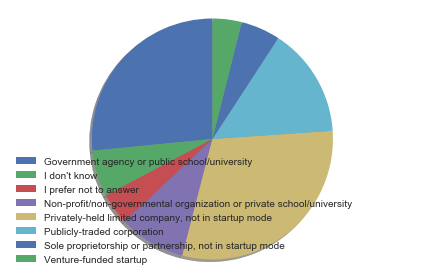

In [217]:
labels = list(top_companies['CompanyType'])
sizes = list(top_companies['Professional'])

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc='lower left')

plt.axis('equal')
plt.tight_layout()

plt.show()

In [218]:
# Need to make this look better... some colors are repeated, the legend should not be overlapping 

#### Data scientists appear to be pretty well distributed across different company types, however, most data scientists are working in government or privately held (non-startup) companies. There are also relatively large portions of data scientists working in publicly traded corporations and non-profits and NGO's. 

## Initial Research Findings
#### 1. Based on the right skewed histograms for job and career satisfaction, it appears that data scientists are generally satisfied with their careers. 
#### 2. Data scientists are concentrated in the UK, the US and Germany. It would be interesting to see whether this is true across all Stack Overflow respondents or if this is unique to data scientists. 
#### 3. Data scientists are finding work in a wide range of industries. Although privately held companies and government are the largest categories in the pie chart, there are many other sectors that appear to be well represented - notably non-profits/NGO's and public corporations.

### Other questions to explore:
#### 1. How do these data compare to the general group of survey respondents? Are data scientist more or less satisfied with their jobs than other job types?
#### 2. How does the distribution of countries compare to the generall population of stack over flow users?
#### 3. How many data scientist work remotely compared to in the office? Are those that work remotely more or less satisfied?
#### 4. In which industries are data scientists most/least satisfied? 
#### 5. Does education level relate to job satisfaction?